In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.optimize import fsolve, fmin, root
from collections import Counter, defaultdict
init_printing(use_unicode=True)

In [53]:
r, c, u, v, E = symbols('r c u v E')

##Simple Case

$f = \dfrac{1}{2}rc^{2} - Ec$ with $r > 0$

$c = \dfrac{E}{r}$

In [3]:
def fsimple(r,c,E):
    return (1/2)*r*c**2-E*c

def csimple(E,r):
    return E/r

In [41]:
c = np.linspace(-5,5,1001)

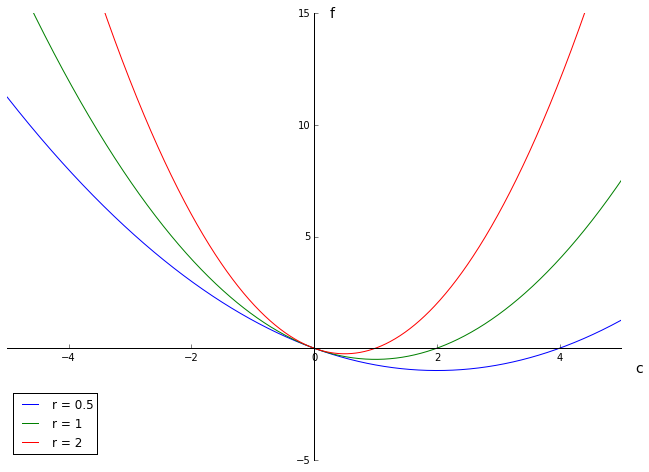

In [5]:
plt.figure(figsize=(11,8))
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.xlim(-5,5), plt.ylim(-5,15)
plt.xlabel('c', fontsize=14)
plt.ylabel('f', rotation='horizontal',verticalalignment='center',  fontsize=14)
plt.gca().yaxis.set_label_coords(0.53,1)
plt.gca().xaxis.set_label_coords(1.03,0.22)
yticks1 = plt.gca().yaxis.get_major_ticks()
yticks1[1].label1.set_visible(False)
plt.plot(c,fsimple(0.5,c,1),label='r = 0.5')
plt.plot(c,fsimple(1,c,1),label='r = 1')
plt.plot(c,fsimple(2,c,1),label='r = 2')
plt.legend(loc='best');

In [6]:
E = np.linspace(0,5)

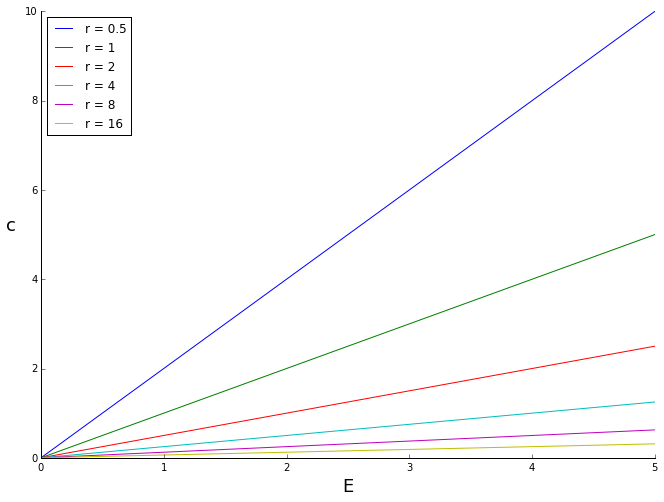

In [7]:
plt.figure(figsize=(11,8))
plt.plot(E,csimple(E,0.5),label='r = 0.5')
plt.plot(E,csimple(E,1),label='r = 1')
plt.plot(E,csimple(E,2),label='r = 2')
plt.plot(E,csimple(E,4),label='r = 4')
plt.plot(E,csimple(E,8),label='r = 8')
plt.plot(E,csimple(E,16),label='r = 16')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.ylabel('c',fontsize=18,rotation='horizontal',labelpad=15)
plt.xlabel('E',fontsize=18)
plt.legend(loc='best');

###Not so simple case

$f = \dfrac{1}{2}rc^{2} + \dfrac{1}{4}|u|c^{4} - Ec$

In [8]:
def f2(r,c,u,E):
    return (1/2)*r*c**2+(1/4)*u*c**4-E*c

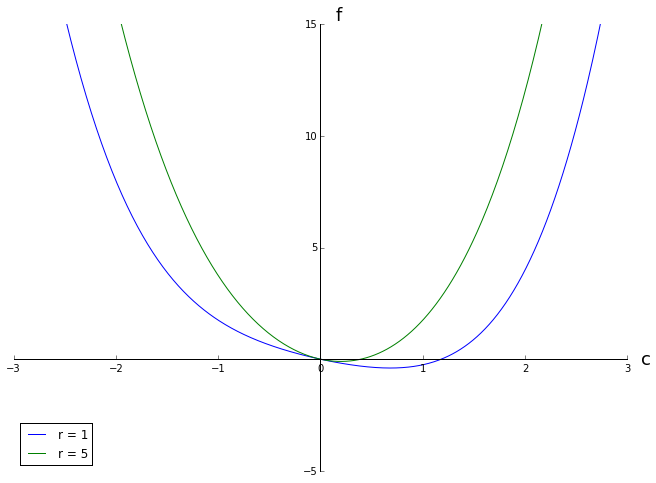

In [9]:
plt.figure(figsize=(11,8))
plt.xlabel('c',fontsize=18)
plt.ylabel('f',fontsize=18,rotation='horizontal',labelpad=15)
plt.xlim(-3,3), plt.ylim(-5,15)
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.gca().yaxis.set_label_coords(0.53,1)
plt.gca().xaxis.set_label_coords(1.03,0.27)
yticks2 = plt.gca().yaxis.get_major_ticks()
yticks2[1].label1.set_visible(False)
plt.plot(c,f2(1,c,1,1),label='r = 1')
plt.plot(c,f2(5,c,1,1),label='r = 5')
plt.legend(loc='best');

In [10]:
def please(r,u,E):
    return ((np.sqrt(12*r**3*u**3+81*u**4*E**2)+9*u**2*E)/2)**(1/3)/(3**(2/3)*u) - (r*(2/3)**(1/3)/((np.sqrt(12*r**3*u**3+81*u**4*E**2)+9*u**2*E))**(1/3))

In [11]:
E2 = np.linspace(-1,5)

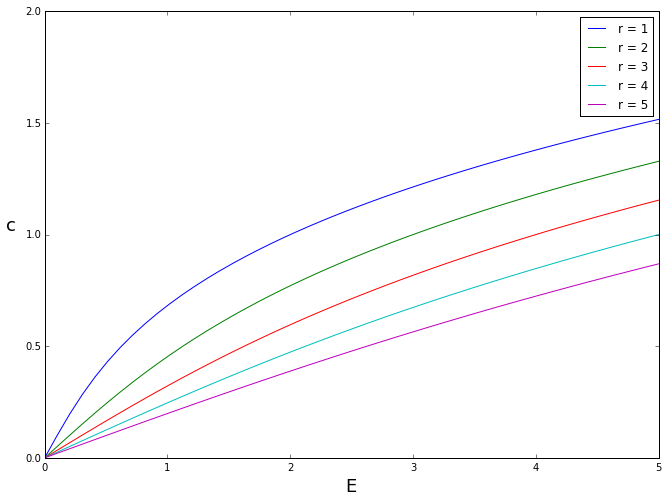

In [12]:
plt.figure(figsize=(11,8))
plt.xlim(0,5),plt.ylim(0,2)
plt.xlabel('E',fontsize=18)
plt.ylabel('c',fontsize=18,rotation='horizontal',labelpad=15)
plt.plot(E,please(1,1,E),label='r = 1')
plt.plot(E,please(2,1,E),label='r = 2')
plt.plot(E,please(3,1,E),label='r = 3')
plt.plot(E,please(4,1,E),label='r = 4')
plt.plot(E,please(5,1,E),label='r = 5')
plt.legend(loc='best');

In [13]:
def Eofc1(r,c,u):
    return r*c+u*c**3

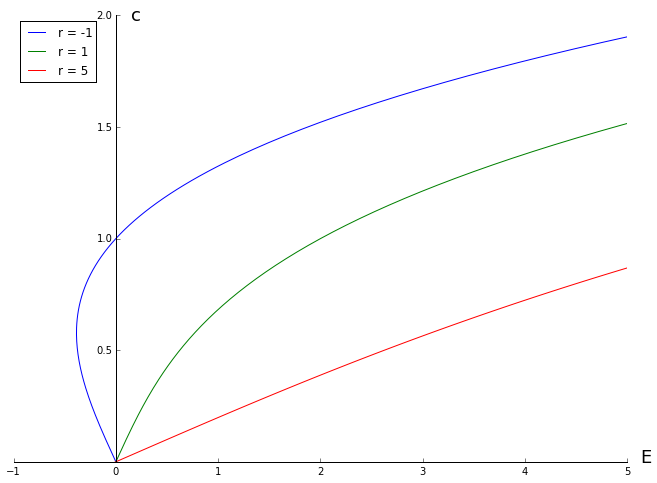

In [14]:
plt.figure(figsize=(11,8))
plt.xlim(-1,5),plt.ylim(0,2)
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.xlim(-1,5), plt.ylim(0,2)
plt.xlabel('E', fontsize=18)
plt.ylabel('c', rotation='horizontal',verticalalignment='center',  fontsize=18)
plt.gca().yaxis.set_label_coords(0.2,1)
plt.gca().xaxis.set_label_coords(1.03,0.03)
yticks3 = plt.gca().yaxis.get_major_ticks()
yticks3[0].label1.set_visible(False)
plt.plot(Eofc1(-1,c,1),c,label='r = -1')
plt.plot(Eofc1(1,c,1),c,label='r = 1')
plt.plot(Eofc1(5,c,1),c,label='r = 5')
plt.legend(loc='best');

###Even less simple

$f = \dfrac{1}{2}rc^{2} - \dfrac{1}{4}|u|c^{4} + \dfrac{1}{6}|v|c^{6} - Ec$

In [6]:
def f3(c,r,u,v,E):
    return (1/2)*r*c**2-(1/4)*abs(u)*c**4+(1/6)*abs(v)*c**6-E*c

def df3(c,r,u,v,E):
    return r*c+u*c**3+v*c**5-E

In [54]:
f = (1/2)*r*c**2+(1/4)*u*c**4+(1/6)*v*c**6-E*c
f

In [55]:
E_c = expand(solve(f.diff(c),E)[0])
E_c

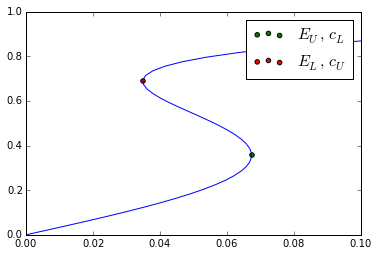

In [65]:
plt.plot(df3(np.linspace(0,1),0.3,-1,1,0),np.linspace(0,1))
plt.scatter(Eu(0.3,-1,1),0.35608274213,c='g',label='$E_U,\ c_L$')
plt.scatter(El(0.3,-1,1),0.687899033839,c='r',label='$E_L,\ c_U$')
plt.xlim(0,0.1),plt.ylim(0,1)
plt.legend(fontsize=16);

In [21]:
El(0.3,-1,1),Eu(0.3,-1,1)

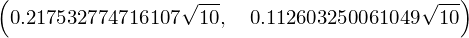

In [58]:
simplify(c_U.subs([(r,0.3),(u,-1),(v,1)])),simplify(c_L.subs([(r,0.3),(u,-1),(v,1)]))

In [59]:
0.217532774716107*np.sqrt(10),0.112603250061049*np.sqrt(10)

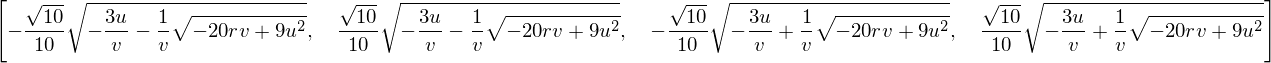

In [7]:
solve(simplify(E_c.diff(c)),c)

In [57]:
c_L = solve(simplify(E_c.diff(c)),c)[1]
c_U = solve(simplify(E_c.diff(c)),c)[3]

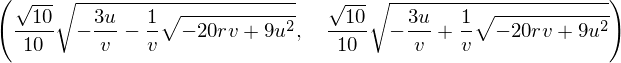

In [7]:
c_L,c_U

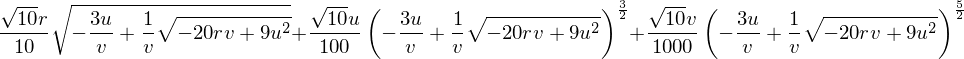

In [40]:
E_c.subs(c,c_U)

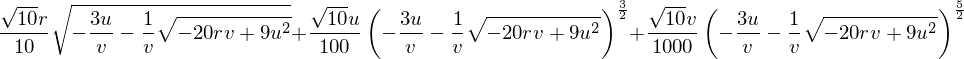

In [43]:
E_c.subs(c,c_L)

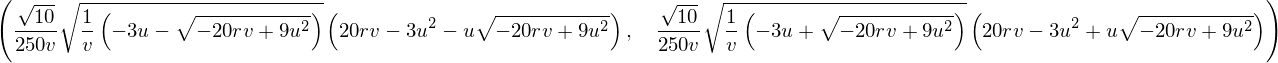

In [13]:
E_U = simplify(E_c.subs(c,c_L))
E_L = simplify(E_c.subs(c,c_U))
E_U,E_L

In [14]:
r = np.linspace(0,0.5)

In [2]:
def E_U(r,u,v):
    return (np.sqrt(10*v*(-3*u-np.sqrt(9*u**2-20*r*v)))*(20*r*v-3*u**2-u*np.sqrt(9*u**2-20*r*v))/(250*v**2))

def E_L(r,u,v):
    return (np.sqrt(10*v*(-3*u+np.sqrt(9*u**2-20*r*v)))*(20*r*v-3*u**2+u*np.sqrt(9*u**2-20*r*v))/(250*v**2))

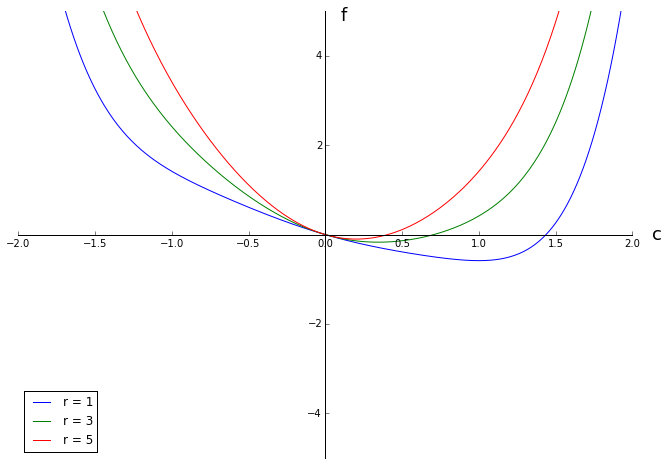

In [302]:
plt.figure(figsize=(11,8))
plt.xlabel('c',fontsize=18)
plt.ylabel('f',fontsize=18,rotation='horizontal',labelpad=15)
plt.xlim(-2,2), plt.ylim(-5,5)
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.gca().yaxis.set_label_coords(0.53,0.97)
plt.gca().xaxis.set_label_coords(1.04,0.52)
yticks4 = plt.gca().yaxis.get_major_ticks()
yticks4[3].label1.set_visible(False)
plt.plot(c,f3(c,1,1,1,1),label='r = 1')
plt.plot(c,f3(c,3,1,1,1),label='r = 3')
plt.plot(c,f3(c,5,1,1,1),label='r = 5')
plt.legend(loc='best');

In [18]:
def Eofc2(r,c,u,v):
    return r*c-u*c**3+v*c**5

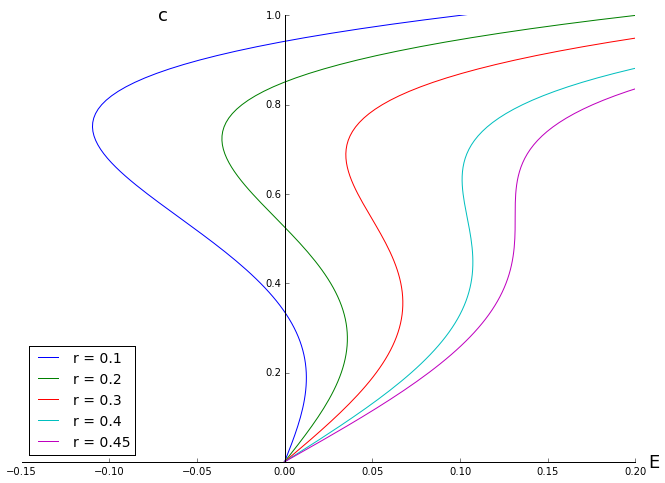

In [313]:
plt.figure(figsize=(11,8))
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.xlim(-0.15,0.2), plt.ylim(0,1)
plt.xlabel('E', fontsize=18)
plt.ylabel('c', rotation='horizontal',verticalalignment='center',  fontsize=18)
plt.gca().yaxis.set_label_coords(0.23,1)
plt.gca().xaxis.set_label_coords(1.03,0.02)
yticks5 = plt.gca().yaxis.get_major_ticks()
yticks5[0].label1.set_visible(False)
plt.plot(Eofc2(0.1,c,1,1),c,label='r = 0.1')
plt.plot(Eofc2(0.2,c,1,1),c,label='r = 0.2')
plt.plot(Eofc2(0.3,c,1,1),c,label='r = 0.3')
plt.plot(Eofc2(0.4,c,1,1),c,label='r = 0.4')
plt.plot(Eofc2(0.45,c,1,1),c,label='r = 0.45')
# plt.plot(Eofc2(0.7,c,1,1),c,label='r = 0.7')
# plt.plot(Eofc2(1,c,1,1),c,label='r = 1')
# plt.plot(Eofc2(1.5,c,1,1),c,label='r = 1.5')
# plt.plot(Eofc2(2,c,1,1),c,label='r = 2')
plt.legend(loc='best',fontsize=14);

In [3]:
s = np.linspace(0,0.5,101)

In [7]:
r3 = 3/16
Ec = np.sqrt(3/10)*(6/25)
r_T, E_T = [],[]
u=-1
v=1
n = 100
for i in np.linspace(0,Ec,n): #E
    for j in np.linspace(r3,9/20,n): #r
        if (E_L(j,u,v) < i) and (i < E_U(j,u,v)):
            c1 = fsolve(df3,np.array([0,1]),args=(j,u,v,i))
            
            f1 = f3(c1[0],j,u,v,i)
            f2 = f3(c1[1],j,u,v,i)
            
            if f1 <= f2:
                r_T.append(j)
                E_T.append(i)
                r3 = j
                break

/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from IPython.kernel.zmq import kernelapp as app
/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


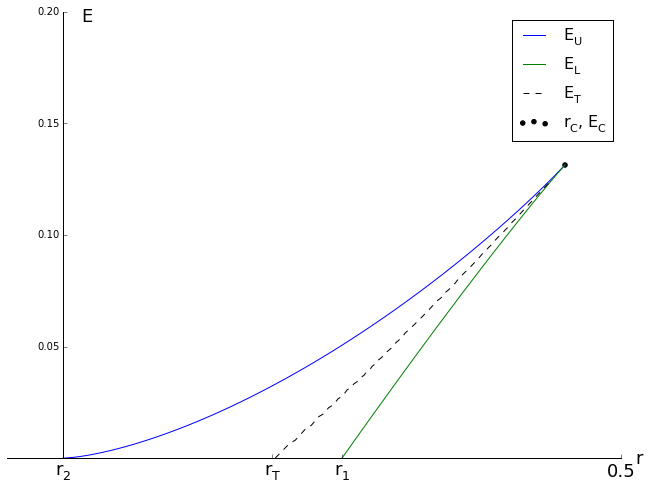

In [9]:
plt.figure(figsize=(11,8))
plt.plot(s,E_U(s,u,v),label='$\mathregular{E_{U}}$')
plt.plot(s,E_L(s,u,v),label='$\mathregular{E_{L}}$')
plt.plot(r_T,E_T,'--k',label='$\mathregular{E_{T}}$')
plt.scatter(0.45,E_L(s,-1,1)[90],c='k',label='$\mathregular{r_{C},\ E_{C}}$')
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
yticks6 = plt.gca().yaxis.get_major_ticks()
yticks6[0].label1.set_visible(False)
plt.gca().yaxis.set_label_coords(0.13,0.97)
plt.gca().xaxis.set_label_coords(1.03,0.02)
plt.xticks([0,0.1875,0.25,0.5],('$\mathregular{r_{2}}$','$\mathregular{r_{T}}$','$\mathregular{r_{1}}$','0.5'),fontsize=18)
plt.xlabel('r',fontsize=18)
plt.ylabel('E',fontsize=18,rotation='horizontal',labelpad=25)
plt.ylim(0,0.2),plt.xlim(-0.05,0.5)
plt.legend(loc='best',fontsize=16);

###$r_{1} = 0.25$

###$r_{2} = 0$

###$r_{C} = 0.45$

###$r_{C} = 0.1875$

###$E_{C} = 0.13145$

In [23]:
Elower(0.45,-1,1),Eupper(0.45,-1,1)

(0.13145341380123987, 0.13145341380123987)

In [24]:
for i in range(s.shape[0]):
    if Elower(s,-1,1)[i]==Eupper(s,-1,1)[i]:
        print(i,s[i])

90 0.45


/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt


In [25]:
for i in range(s.shape[0]):
    if Eupper(s,-1,1)[i]==0:
        print(i,s[i])

50 0.25


/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt
